In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r'Ready_df3.csv')


In [3]:
data

,Appliances,T1,T2,T3,T4,T5,T6,T9,T_out,Tdewpoint,month,Total_Temperature
0,60,19.890000,19.200000,19.790000,19.000000,17.166667,7.026667,17.033333,6.600000,5.300000,1,17.167407
1,60,19.890000,19.200000,19.790000,19.000000,17.166667,6.833333,17.066667,6.483333,5.200000,1,17.149630
2,50,19.890000,19.200000,19.790000,18.926667,17.166667,6.560000,17.000000,6.366667,5.100000,1,17.103704
3,50,19.890000,19.200000,19.790000,18.890000,17.166667,6.433333,17.000000,6.250000,5.000000,1,17.067037
4,60,19.890000,19.200000,19.790000,18.890000,17.200000,6.366667,17.000000,6.133333,4.900000,1,17.070741
...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,25.890000,27.200000,24.700000,23.200000,24.796667,23.200000,22.733333,13.333333,5,24.861481
19731,90,25.500000,25.754000,27.133333,24.700000,23.230000,24.196667,23.200000,22.600000,13.300000,5,24.774571
19732,270,25.500000,25.628571,27.050000,24.700000,23.230000,23.626667,23.200000,22.466667,13.266667,5,24.686138
19733,420,25.500000,25.414000,26.890000,24.700000,23.200000,22.433333,23.200000,22.333333,13.233333,5,24.499981


In [4]:
# Split the data into features and target variable
X = data.drop(['Appliances'], axis=1)
y = data['Appliances']


In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Choose a regression model
model = RandomForestRegressor(random_state=42)


In [8]:
# Train the model
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Predict energy consumption
y_pred = model.predict(X_test_scaled)


In [14]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [15]:
# Print regression metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 31.08816822903471
Mean Squared Error: 4210.911046364327
R-squared: 0.5792072834369617


1. **Mean Absolute Error** - The model's predictions are off by approximately 31.08 Wh (Watt-hours) from the actual energy consumption values.
2. **Mean Squared Error** - Values indicate higher variability of errors in the predictions.
3. **R2** - Value of 0.57 suggests that approximately 57% of the variance in energy consumption is explained by the features included in the model.

In [16]:
# Add probabilities to the dataframe
data['PredictedEnergy'] = model.predict(scaler.transform(X))

In [18]:
data

,Appliances,T1,T2,T3,T4,T5,T6,T9,T_out,Tdewpoint,month,Total_Temperature,PredictedEnergy
0,60,19.890000,19.200000,19.790000,19.000000,17.166667,7.026667,17.033333,6.600000,5.300000,1,17.167407,69.4
1,60,19.890000,19.200000,19.790000,19.000000,17.166667,6.833333,17.066667,6.483333,5.200000,1,17.149630,64.9
2,50,19.890000,19.200000,19.790000,18.926667,17.166667,6.560000,17.000000,6.366667,5.100000,1,17.103704,65.4
3,50,19.890000,19.200000,19.790000,18.890000,17.166667,6.433333,17.000000,6.250000,5.000000,1,17.067037,68.5
4,60,19.890000,19.200000,19.790000,18.890000,17.200000,6.366667,17.000000,6.133333,4.900000,1,17.070741,57.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,25.890000,27.200000,24.700000,23.200000,24.796667,23.200000,22.733333,13.333333,5,24.861481,117.6
19731,90,25.500000,25.754000,27.133333,24.700000,23.230000,24.196667,23.200000,22.600000,13.300000,5,24.774571,174.3
19732,270,25.500000,25.628571,27.050000,24.700000,23.230000,23.626667,23.200000,22.466667,13.266667,5,24.686138,238.7
19733,420,25.500000,25.414000,26.890000,24.700000,23.200000,22.433333,23.200000,22.333333,13.233333,5,24.499981,240.0


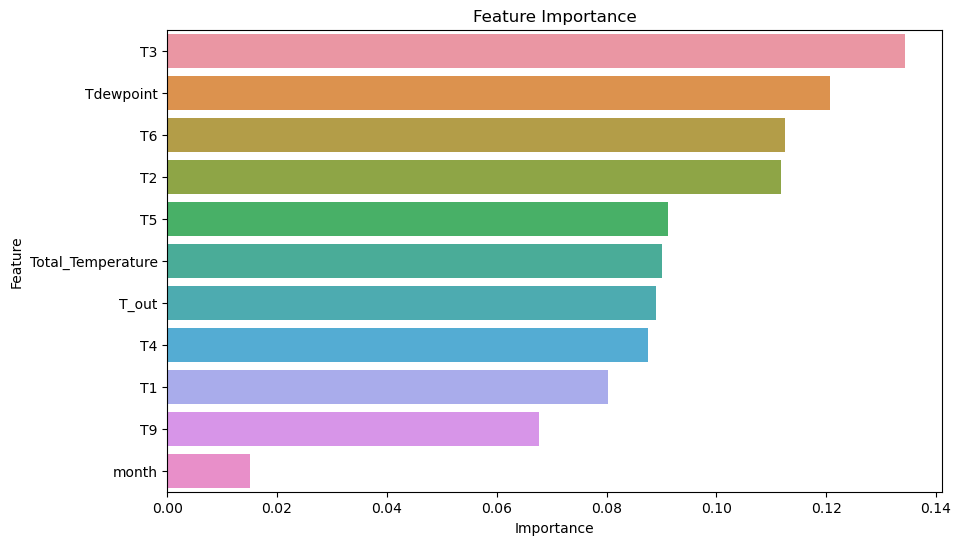

In [23]:
# feature_importances_ attribute from my model
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## K-means clustering to identify groups of similar energy consumption patterns

In [25]:

from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.tree import DecisionTreeRegressor


In [26]:

X = data.drop(['PredictedEnergy'], axis=1)  # Features
y = data['PredictedEnergy']  # Target variable


In [31]:
import warnings
warnings.filterwarnings('ignore')


In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Analyze cluster characteristics
for cluster in range(5):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())

Cluster 0:
         Appliances            T1            T2            T3            T4  \
count  13509.000000  13509.000000  13509.000000  13509.000000  13509.000000   
mean      54.061737     21.544908     20.056958     22.126419     20.743827   
std       13.948254      1.598287      2.146242      1.966406      2.072501   
min       10.000000     16.790000     16.100000     17.200000     15.100000   
25%       50.000000     20.600000     18.550000     20.600000     19.390000   
50%       50.000000     21.463333     19.633333     22.000000     20.500000   
75%       60.000000     22.426667     21.100000     23.200000     22.000000   
max       80.000000     25.790000     29.856667     28.790000     26.200000   

                 T5            T6            T9         T_out     Tdewpoint  \
count  13509.000000  13509.000000  13509.000000  13509.000000  13509.000000   
mean      19.505381      7.200677     19.432619      6.845523      3.681596   
std        1.811697      5.917484      2

In [29]:
data['Cluster'].value_counts()

Cluster
0    13509
4     4166
1     1125
2      679
3      256
Name: count, dtype: int64

##  cluster analysis

Cluster 0:
- This cluster represents households with relatively low energy consumption since it has a mean PredictedEnergy of 60.32.
- The temperatures in various rooms are moderate, ranging from around 19°C to 22°C.
- The outdoor temperature (T_out) and dewpoint temperature (Tdewpoint) are also moderate, indicating mild weather conditions.
- This cluster likely represents energy-efficient households or households with smaller sizes and fewer occupants.


Cluster 1:
- This cluster represents households with high energy consumption since it has a mean PredictedEnergy of 238.41.
- The temperatures in various rooms are slightly higher than in Cluster 0, ranging from around 20°C to 23°C.
- The outdoor temperature (T_out) and dewpoint temperature (Tdewpoint) are also higher than in Cluster 0, suggesting warmer weather conditions.
- This cluster may include larger households or households with less energy-efficient appliances or practices.

Cluster 2:
- This cluster represents households with very high energy consumption beacause of mean PredictedEnergy of 323.53.
- The temperatures in various rooms are similar to Cluster 1, ranging from around 20°C to 22°C.
- The outdoor temperature (T_out) and dewpoint temperature (Tdewpoint) are slightly lower than in Cluster 1, indicating milder weather conditions.
- This cluster may include households with energy-intensive appliances or activities, such as heating, cooling, or specialized equipment.


Cluster 3:
- This cluster represents households with extremely high energy consumption since it has a mean PredictedEnergy of 485.56.
- The temperatures in various rooms are similar to Clusters 1 and 2, ranging from around 20°C to 23°C.
- The outdoor temperature (T_out) and dewpoint temperature (Tdewpoint) are also similar to Clusters 1 and 2, suggesting moderate weather conditions.
- This cluster likely includes households with very large sizes, multiple energy-intensive appliances, or inefficient energy practices.




Cluster 4:
- This cluster represents households with moderate energy consumption since it has a mean PredictedEnergy of 120.9.
- The temperatures in various rooms are slightly higher than in Cluster 0, ranging from around 21°C to 22°C.
- The outdoor temperature (T_out) and dewpoint temperature (Tdewpoint) are also higher than in Cluster 0, indicating warmer weather conditions.
- This cluster may include households with moderate sizes and energy consumption patterns, or households that have implemented some energy-efficiency measures.



Based on these insights, we can provide targeted recommendations for energy efficiency improvements to households in different clusters. 
For example, households in Clusters 1, 2, and 3 with high energy consumption could benefit from measures such as improved insulation, energy-efficient
appliances, temperature control systems, and behavioral changes related to energy usage. Households in Cluster 0 could serve as benchmarks
for energy-efficient practices, while households in Cluster 4 could explore additional energy-saving opportunities to further reduce their consumption.

In [48]:
data.to_csv('analysed.csv', index=False)

In [37]:

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Evaluate the model
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8399.467950342032
R-squared: 0.1606483970825726


In [51]:
data.to_csv('analysed_df.csv', index=False)